In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn
import torchmetrics 
import tenseal as ts
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.1
torchvision version: 0.15.2


### Tensors, Dimension and Shape

In [2]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
scalar.ndim

0

In [4]:
scalar.item()

7

In [5]:
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [6]:
vector.ndim, vector.shape

(1, torch.Size([2]))

In [7]:
MATRIX = torch.tensor([[7, 8], 
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [8]:
MATRIX.ndim, MATRIX.shape

(2, torch.Size([2, 2]))

### Random Tensors

In [9]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.7170, 0.8074, 0.6171, 0.7579],
         [0.7785, 0.2726, 0.7382, 0.8462],
         [0.0976, 0.5876, 0.3120, 0.1204]]),
 torch.float32)

In [10]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [11]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

In [12]:
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape or torch.ones_like(input)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Datatypes

In [14]:
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded 
float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [15]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

### Operations

In [16]:
tensor = torch.tensor([1, 2, 3])
tensor + 10, tensor * 10, tensor - 10

(tensor([11, 12, 13]), tensor([10, 20, 30]), tensor([-9, -8, -7]))

In [17]:
torch.multiply(tensor, 10)  # torch.mul(), torch.add()

tensor([10, 20, 30])

In [18]:
tensor

tensor([1, 2, 3])

In [19]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [20]:
# Matrix multiplication
torch.matmul(tensor, tensor), tensor @ tensor

(tensor(14), tensor(14))

In [21]:
x = torch.arange(0, 100, 10)
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x), tensor.argmax(), tensor.argmin()

(tensor(90), tensor(0), tensor(45.), tensor(450), tensor(2), tensor(0))

In [22]:
tensor = torch.arange(10., 100., 10.)
tensor_float16 = tensor.type(torch.float16)
tensor_int8 = tensor.type(torch.int8)
tensor_float16, tensor_int8

(tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16),
 tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8))

### Tensor Manipulation

In [23]:
# Reshape
x_reshaped = x.reshape(10, 1)

In [24]:
# Changing the View
# keeps same data as original but changes view
z = x.view(1,10)
z

tensor([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]])

In [25]:
z[:, 0] = 5
z, x

(tensor([[ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]]),
 tensor([ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

In [26]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # dim=1 (horizontal/column)
x_stacked

tensor([[ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
        [ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
        [ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
        [ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]])

In [27]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension/single dimension  from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")

Previous tensor: tensor([[ 5],
        [10],
        [20],
        [30],
        [40],
        [50],
        [60],
        [70],
        [80],
        [90]])
Previous shape: torch.Size([10, 1])

New tensor: tensor([ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90])


In [28]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90])
Previous shape: torch.Size([10])

New tensor: tensor([[ 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]])
New shape: torch.Size([1, 10])


In [29]:
# Create tensor with specific shape
x_original = torch.rand(size=(2, 4, 6))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([2, 4, 6])
New shape: torch.Size([6, 2, 4])


### Tensors and NumPy

In [30]:
# NumPy array to tensor
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [31]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [32]:
# # Set the random seed
RANDOM_SEED=42 
torch.manual_seed(seed=RANDOM_SEED) 
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called 
# Without this, tensor_D would be different to tensor_C 
torch.random.manual_seed(seed=RANDOM_SEED) 
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### PyTorch and GPU

In [33]:
# device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "cuda" if torch.cuda.is_available() else "cpu"
# You can put tensors and models on a specific device by calling to(device) on them
# Putting a tensor on GPU using to(device) (e.g. some_tensor.to(device)) returns a copy of that tensor
# e.g. the same tensor will be on CPU and GPU. 
# To overwrite tensors, reassign them:
# some_tensor = some_tensor.to(device)
# If tensor is on GPU, can't transform it to NumPy (this will error)

### Linear Regression

Creating Training and Testing data

In [34]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Creating Linear Regression Model

In [35]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights
                                                dtype=torch.float), # 
                                   requires_grad=True) # can we update this value with gradient descent?

        self.bias = nn.Parameter(torch.randn(1, 
                                            dtype=torch.float),
                                requires_grad=True) 
# OR      
#         self.linear_layer = nn.Linear(in_features=1, 
#                                       out_features=1)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: #"x" is the input data
        return self.weights * x + self.bias # linear regression formula 
# OR
#         return self.linear_layer(x)

In [36]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters()), model_0.state_dict() # Viewing the parameters

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [37]:
# Make predictions with model
with torch.inference_mode(): # torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

Training Linear Regression Model

In [38]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should 

In [39]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer (because gradients accumuulate over the time)
    optimizer.zero_grad()

    # 4. Loss backwards /  Back propagation
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819


In [40]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Saving and Loading the Model

In [44]:
# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# # 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# # 3. Save the model state dict 
# print(f"Saving model to: {MODEL_SAVE_PATH}")
# torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
#            f=MODEL_SAVE_PATH) 

In [45]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [46]:
# Check model device
next(model_0.parameters()).device

device(type='cpu')

In [47]:
# # Set model to GPU if it's availalble, otherwise it'll default to CPU
# model_0.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
# next(model_0.parameters()).device

### Binary Classification Model

In [48]:
from sklearn.datasets import make_circles
# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

print(X[:5], y[:5])
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
print(circles.label.value_counts())
circles.head()

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]] [1 1 1 1 0]
1    500
0    500
Name: label, dtype: int64


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


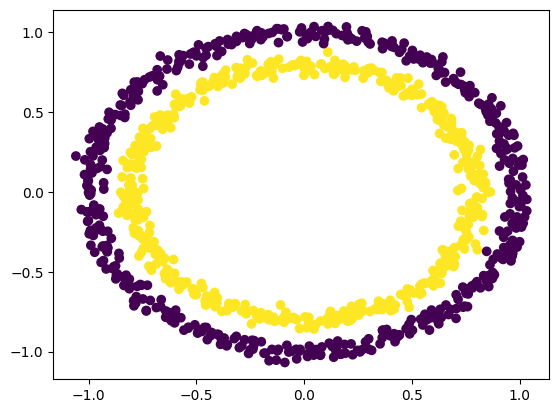

In [49]:
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y) # Colouring it with labels)

In [50]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [52]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [53]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [54]:
# Another way of defining the above network
# model_0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# model_0

In [55]:
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in
optimizer = torch.optim.SGD(params=model_0.parameters(),  lr=0.1)
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    
    correct = torch.eq(y_true, y_pred).sum().item() 
    acc = (correct / len(y_pred)) * 100 
    return acc

In [56]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70360, Accuracy: 50.00% | Test loss: 0.69341, Test acc: 52.50%
Epoch: 10 | Loss: 0.70129, Accuracy: 49.25% | Test loss: 0.69221, Test acc: 52.50%
Epoch: 20 | Loss: 0.69976, Accuracy: 49.00% | Test loss: 0.69154, Test acc: 52.50%
Epoch: 30 | Loss: 0.69868, Accuracy: 48.88% | Test loss: 0.69115, Test acc: 53.00%
Epoch: 40 | Loss: 0.69788, Accuracy: 49.00% | Test loss: 0.69092, Test acc: 53.50%
Epoch: 50 | Loss: 0.69726, Accuracy: 48.88% | Test loss: 0.69079, Test acc: 55.00%
Epoch: 60 | Loss: 0.69677, Accuracy: 48.38% | Test loss: 0.69072, Test acc: 53.50%
Epoch: 70 | Loss: 0.69637, Accuracy: 48.38% | Test loss: 0.69070, Test acc: 53.50%
Epoch: 80 | Loss: 0.69604, Accuracy: 48.75% | Test loss: 0.69071, Test acc: 54.00%
Epoch: 90 | Loss: 0.69577, Accuracy: 48.38% | Test loss: 0.69073, Test acc: 54.00%


In [57]:
import requests
# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


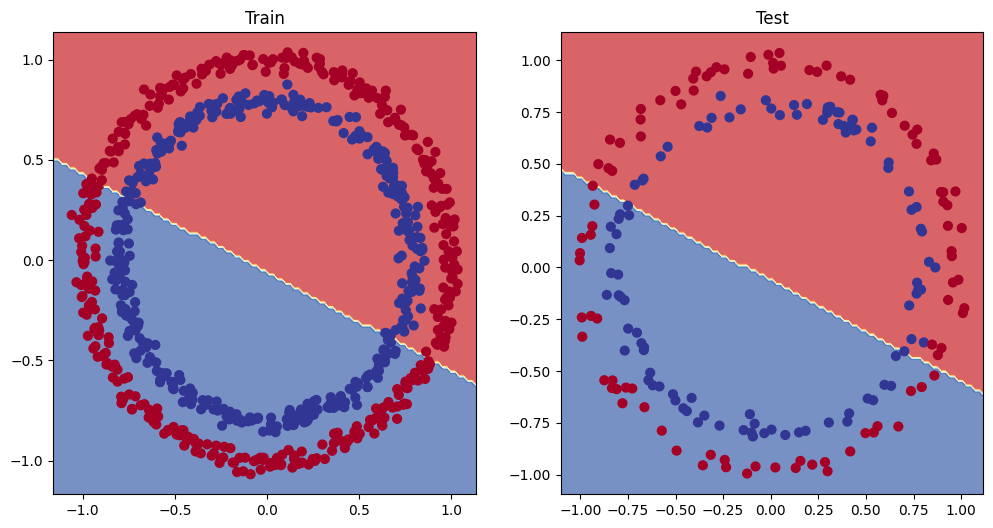

In [58]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [59]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [60]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [61]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
        # 2. Calcuate loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
          print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


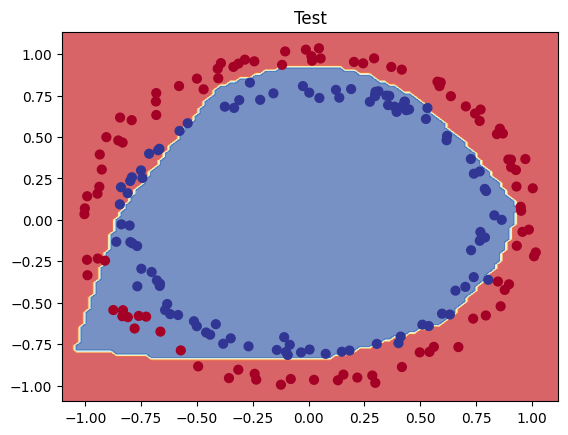

In [62]:
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### Multi-class Classification Model

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


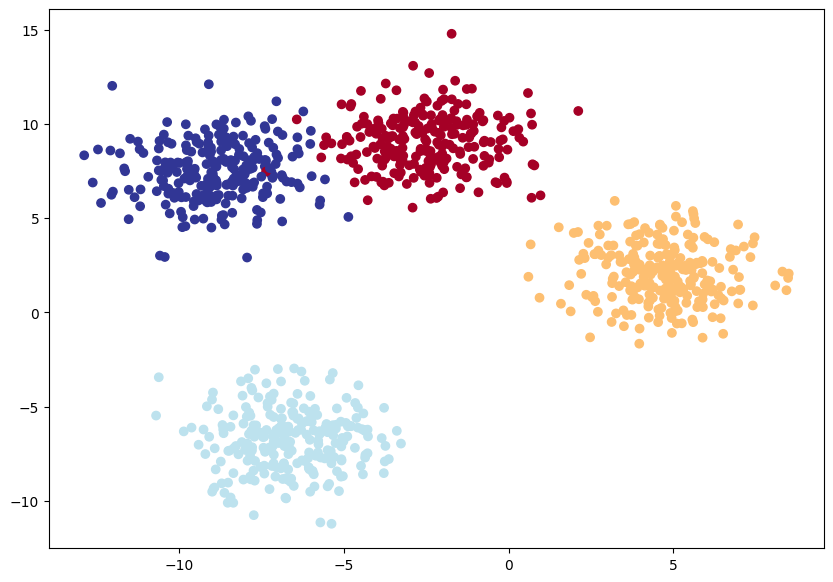

In [63]:
from sklearn.datasets import make_blobs

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, 
    centers=NUM_CLASSES, 
    cluster_std=1.5,
    random_state=RANDOM_SEED
)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [64]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [65]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
#             nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
#             nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [66]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.1)

In [67]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        # 2. Calculate test loss and accuracy
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


In [78]:
X_blob_test.device, y_blob_test.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [83]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.cpu()).to(device)

# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


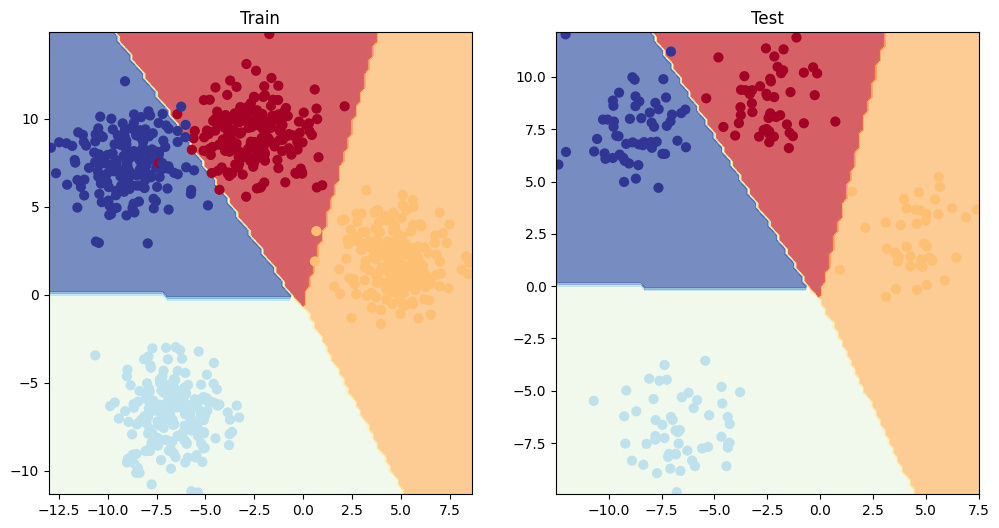

In [84]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [85]:
torchmetrics_accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=4).to(device)
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')